# Analyze Air-Crash from (1908 - 2009) ✈

*Exploratory Data Analysis*

---



# Import all necessary libaries


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt


In [5]:
import plotly.express as px

In [6]:
from wordcloud import WordCloud, STOPWORDS 

# Load the Data from drive

In [7]:
data = pd.read_csv("/content/drive/MyDrive/Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [110]:
data.head(10)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Death Percentage
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,49,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.00
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,49,178,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,100.00
2,08/06/1913,15:00,"Victoria, British Columbia, Canada",Private,Training,Curtiss seaplane,49,178,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,100.00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,Training,Zeppelin L-1 (airship),49,178,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,70.00
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,Training,Zeppelin L-2 (airship),49,178,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,100.00
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,Training,Zeppelin L-8 (airship),49,178,41.0,21.0,0.0,Crashed into trees while attempting to land af...,51.22
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,Training,Zeppelin L-10 (airship),49,178,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when...",100.00
7,07/28/1916,15:00,"Near Jambol, Bulgeria",Military - German Army,Training,Schutte-Lanz S-L-10 (airship),49,178,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown.",100.00
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,Training,Zeppelin L-32 (airship),49,178,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.,100.00
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,Training,Zeppelin L-31 (airship),49,178,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...,100.00


# Insert Death percentage to the data

Calculate Death percentage

In [9]:
round(((data['Fatalities']/data['Aboard'])*100),2)

0        50.0
1       100.0
2       100.0
3        70.0
4       100.0
        ...  
5263     87.5
5264    100.0
5265    100.0
5266    100.0
5267    100.0
Length: 5268, dtype: float64

In [10]:
data['Death Percentage'] = round(((data['Fatalities']/data['Aboard'])*100),2)
data['Death Percentage']

0        50.0
1       100.0
2       100.0
3        70.0
4       100.0
        ...  
5263     87.5
5264    100.0
5265    100.0
5266    100.0
5267    100.0
Name: Death Percentage, Length: 5268, dtype: float64

Describe all columns

In [11]:
data.describe(include = 'all')


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Death Percentage
count,5268,3049,5248,5250,1069,3562,5241,4933,4040,5246.000000,5256.000000,5246.000000,4878,5244.000000
unique,4753,1005,4303,2476,724,3244,2446,4905,3707,NaN,NaN,NaN,4673,NaN
top,09/11/2001,15:00,"Sao Paulo, Brazil",Aeroflot,-,Training,Douglas DC-3,49,178,NaN,NaN,NaN,Crashed during takeoff.,NaN
freq,4,32,15,179,67,81,334,3,6,NaN,NaN,NaN,15,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.554518,20.068303,1.608845,NaN,83.493139
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.076711,33.199952,53.987827,NaN,29.877143
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000,0.000000,NaN,80.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,9.000000,0.000000,NaN,100.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,23.000000,0.000000,NaN,100.000000


In [12]:
data.dtypes

Date                 object
Time                 object
Location             object
Operator             object
Flight #             object
Route                object
Type                 object
Registration         object
cn/In                object
Aboard              float64
Fatalities          float64
Ground              float64
Summary              object
Death Percentage    float64
dtype: object

# Clean the Data

Check any null data

In [13]:
data.isnull().sum()

Date                   0
Time                2219
Location              20
Operator              18
Flight #            4199
Route               1706
Type                  27
Registration         335
cn/In               1228
Aboard                22
Fatalities            12
Ground                22
Summary              390
Death Percentage      24
dtype: int64

In [14]:
data.shape

(5268, 14)

Find the most ferquent value to replace with null value

In [15]:
data['Location'].value_counts().idxmax()

'Sao Paulo, Brazil'

Drop the Unwanted data from Data

In [16]:
data.drop('Flight #',axis=1, inplace=True)

In [17]:
data.isnull().sum()

Date                   0
Time                2219
Location              20
Operator              18
Route               1706
Type                  27
Registration         335
cn/In               1228
Aboard                22
Fatalities            12
Ground                22
Summary              390
Death Percentage      24
dtype: int64

Replace the Null value with most frequent value to the Data

In [18]:
null_col = ['Time', 'Location','Operator', 'Route', 'Type', 'Registration', 'cn/In', 'Summary']

In [19]:
for col in null_col:
  data[col].fillna(data[col].value_counts().idxmax(), inplace=True)

In [105]:
null_col1 = ['Aboard', 'Fatalities', 'Ground', 'Death Percentage']

In [106]:
for col1 in null_col1:
  data[col1].fillna(round(data[col1].mean()), inplace=True)

In [107]:
data.isnull().sum()

Date                0
Time                0
Location            0
Operator            0
Route               0
Type                0
Registration        0
cn/In               0
Aboard              0
Fatalities          0
Ground              0
Summary             0
Death Percentage    0
dtype: int64

In [108]:
data.head(10)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Death Percentage
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,49,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.00
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,49,178,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,100.00
2,08/06/1913,15:00,"Victoria, British Columbia, Canada",Private,Training,Curtiss seaplane,49,178,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,100.00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,Training,Zeppelin L-1 (airship),49,178,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,70.00
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,Training,Zeppelin L-2 (airship),49,178,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,100.00
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,Training,Zeppelin L-8 (airship),49,178,41.0,21.0,0.0,Crashed into trees while attempting to land af...,51.22
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,Training,Zeppelin L-10 (airship),49,178,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when...",100.00
7,07/28/1916,15:00,"Near Jambol, Bulgeria",Military - German Army,Training,Schutte-Lanz S-L-10 (airship),49,178,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown.",100.00
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,Training,Zeppelin L-32 (airship),49,178,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.,100.00
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,Training,Zeppelin L-31 (airship),49,178,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...,100.00


# Generate WordCloud

Load the Stopword for WordCloud

In [24]:
stopwords = set(STOPWORDS)

In [25]:
location=data['Location'].value_counts()
location

Sao Paulo, Brazil                    35
Moscow, Russia                       15
Rio de Janeiro, Brazil               14
Manila, Philippines                  13
Bogota, Colombia                     13
                                     ..
Near Charana, Bolivia                 1
Monte Matto, Italy                    1
Misaki Mountain, Japan                1
Angelholm, Sweden                     1
State of Arunachal Pradesh, India     1
Name: Location, Length: 4303, dtype: int64

Generate the Wordcloud to find most air-crash Location happes in the world 


In [26]:
word_cloud = WordCloud(stopwords=stopwords, background_color='white').generate_from_frequencies(location)

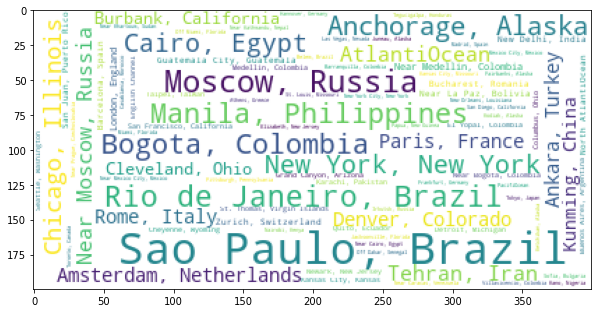

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud)
plt.show()


Generate the Wordcloud to find out the most Airline crashed in the world

In [28]:
airline = data['Operator'].value_counts()
airline

Aeroflot                               197
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
China National Aviation Corporation     44
                                      ... 
Military - Argentine Navy                1
Richland Flying Service - Air Taxii      1
Harbor Airlines - Air Taxi               1
Aerovias Venezolanas SA (Venezuela)      1
Strait Air                               1
Name: Operator, Length: 2476, dtype: int64

In [29]:
word_cloud1 = WordCloud(stopwords=STOPWORDS, background_color='white').generate_from_frequencies(airline)

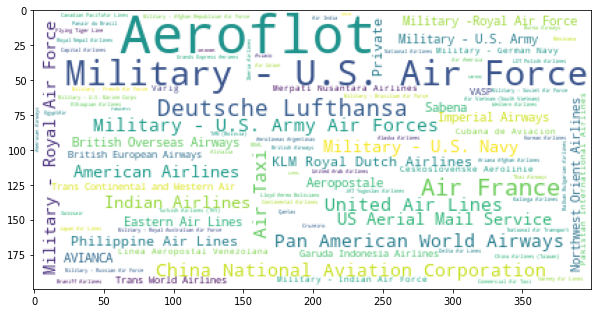

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud1)
plt.show()

Generate the Wordcloud to find out the most Route causes the air-crash in the world

In [31]:
purpose = data['Route'].value_counts()
purpose

Training                      1787
Sightseeing                     29
Test flight                     17
Test                             6
Sao Paulo - Rio de Janeiro       5
                              ... 
Manila - Lapu Lapu               1
Saint Denis - Paris              1
Cork - London                    1
Peoria, IL - St. Louis, MO       1
Mechuka for Jorhat               1
Name: Route, Length: 3244, dtype: int64

In [32]:
word_cloud2 = WordCloud(stopwords=STOPWORDS, background_color='white').generate_from_frequencies(purpose)

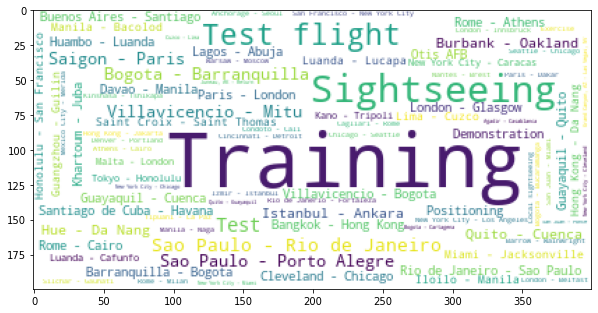

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud2)
plt.show()

Generate the Wordcloud to find out the most Flight type crashed in the world

In [34]:
flight_type = data['Type'].value_counts()
flight_type

Douglas DC-3                                361
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
                                           ... 
Boeing 727-21                                 1
NAMC-YS-11-111                                1
Lockheed EC-121H                              1
Cessna 205A                                   1
Airbus A330-203                               1
Name: Type, Length: 2446, dtype: int64

In [35]:
word_cloud3 = WordCloud(stopwords=STOPWORDS, background_color='white').generate_from_frequencies(flight_type)

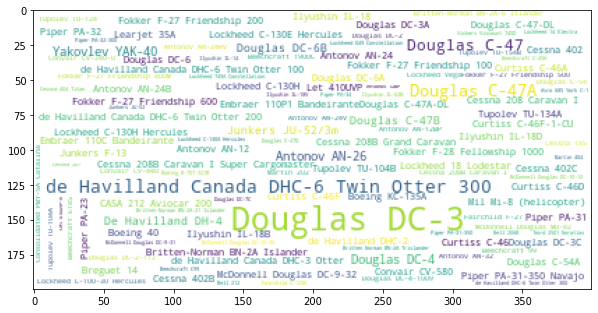

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud3)
plt.show()

Generate the Wordcloud to find out the most Reason causes the air-crash in the world

In [37]:
reason = data['Summary'].value_counts()
reason

Crashed during takeoff.                                                                                                                                                                                                                                                                                                                        405
Crashed into the sea.                                                                                                                                                                                                                                                                                                                           12
Crashed into a mountain.                                                                                                                                                                                                                                                                                                          

In [38]:
word_cloud4 = WordCloud(stopwords=STOPWORDS, background_color='white').generate_from_frequencies(reason)


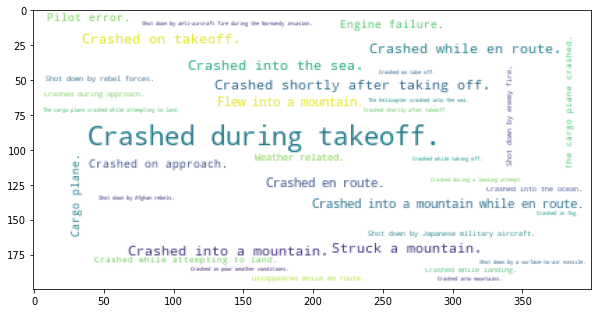

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud4)
plt.show()

Find the outlier and remove it

In [40]:
data['Fatalities'].replace(87.0,28.0, inplace=True)

# Generate Visuals

Generate Heatmap and Co-realation B/W data

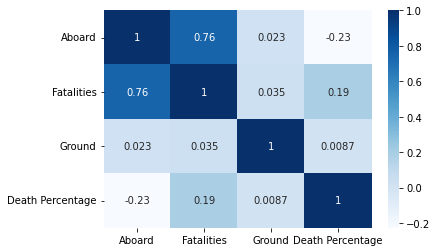

<Figure size 720x720 with 0 Axes>

In [41]:
sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.figure(figsize=(10,10))
plt.show()

Generate Scatterplot to Aboard Vs Death Percentage

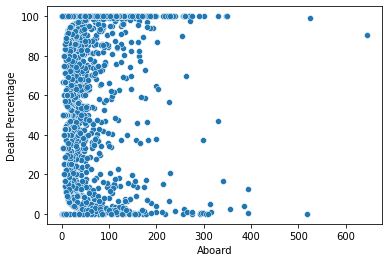

<Figure size 720x720 with 0 Axes>

In [42]:
sns.scatterplot(x=data['Aboard'],y=data['Death Percentage'],data=data)
plt.figure(figsize=(10,10))
plt.show()

Generate Lineplot to Aboard Vs Death Percentage

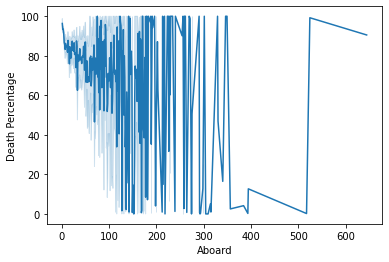

In [43]:
sns.lineplot(x=data['Aboard'], y=data['Death Percentage'])

Generate Distribution plot to Death Percentage

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


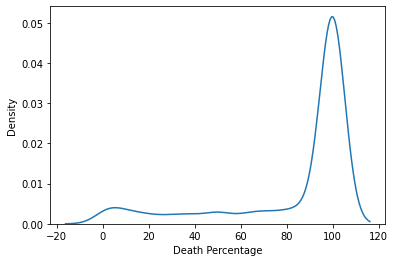

In [44]:
sns.distplot(data['Death Percentage'],hist=False)


Generate Regression plot to Aboard Vs Death Percentage

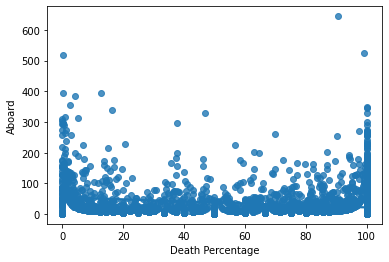

In [45]:
sns.regplot(x=data['Death Percentage'],y=data['Aboard'])


Generate Scatter plot to Route Vs Fatalities

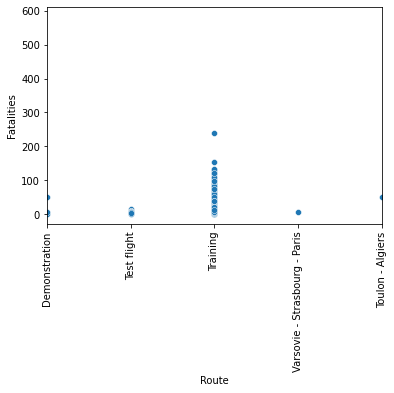

In [46]:
sns.scatterplot(x=data['Route'],y=data['Fatalities'])
plt.xticks(rotation=90)
plt.xlim(0,4)
plt.show()

# Generate Barplots using Ploty

Find most Flight type in Death Percentage

In [96]:
Type=data[['Type','Death Percentage']].value_counts().to_frame('Crash Counts').head(10)
Type.reset_index(inplace=True)
Type

,Type,Death Percentage,Crash Counts
0,Douglas DC-3,100.0,224
1,Douglas C-47A,100.0,57
2,de Havilland Canada DHC-6 Twin Otter 300,100.0,47
3,Douglas C-47,100.0,43
4,Antonov AN-26,100.0,28
5,De Havilland DH-4,100.0,26
6,Douglas DC-4,100.0,23
7,Yakovlev YAK-40,100.0,22
8,Douglas C-47B,100.0,22
9,Breguet 14,100.0,21


In [48]:
data.duplicated().value_counts()

False    5268
dtype: int64

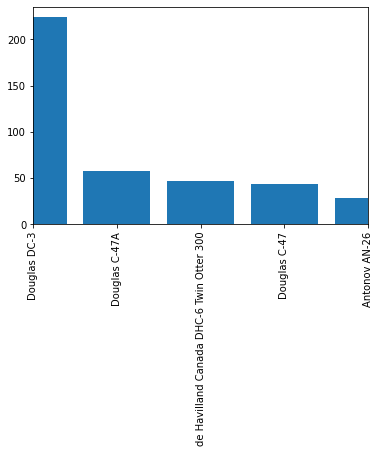

In [97]:
plt.bar(x=Type['Type'],height=Type['Crash Counts'],)
plt.xlim(0,4)
plt.xticks(rotation=90)
plt.show()


Generate Barplot to Flight type Vs Death percentage

In [98]:
fig=px.bar(x='Type', y='Death Percentage',data_frame=Type,color=Type['Crash Counts'],text=Type['Crash Counts'], barmode='group')
fig.show()

Generate Barplot to Route Vs Death Percentage

In [93]:
route=data[['Route','Death Percentage']].value_counts().to_frame('Crash Counts').head(10)
route.reset_index(inplace=True)
route

,Route,Death Percentage,Crash Counts
0,Training,100.00,1278
1,Training,50.00,38
2,Training,66.67,33
3,Training,33.33,18
4,Sightseeing,100.00,17
5,Training,0.00,15
6,Training,75.00,13
7,Test flight,100.00,13
8,Training,60.00,12
9,Training,83.33,11


In [95]:
fig = px.bar(data_frame=route, x='Route', y='Death Percentage',color='Crash Counts',text='Crash Counts')
fig.show()

Generate Barplot to Reason Vs Death Percentage

In [99]:
reason=data[['Summary','Death Percentage']].value_counts().to_frame('Crash Counts').head(10)
reason.reset_index(inplace=True)
reason

,Summary,Death Percentage,Crash Counts
0,Crashed during takeoff.,100.0,321
1,Crashed during takeoff.,50.0,17
2,Struck a mountain.,100.0,11
3,Crashed into a mountain.,100.0,10
4,Crashed into the sea.,100.0,9
5,Crashed shortly after taking off.,100.0,8
6,Crashed on takeoff.,100.0,8
7,Crashed while en route.,100.0,7
8,Crashed en route.,100.0,7
9,Flew into a mountain.,100.0,6


In [100]:

fig = px.bar(data_frame=reason, x='Summary', y='Death Percentage',color='Crash Counts',text='Crash Counts')
fig.show()

Generate Barplot to Location Vs Death Percentage

In [101]:
crash_location=data[['Location','Death Percentage']].value_counts().to_frame('Crash Counts').head(10)
crash_location.reset_index(inplace=True)
crash_location

,Location,Death Percentage,Crash Counts
0,"Sao Paulo, Brazil",100.0,21
1,"Moscow, Russia",100.0,10
2,"Bogota, Colombia",100.0,9
3,"Anchorage, Alaska",100.0,9
4,"Rio de Janeiro, Brazil",100.0,8
5,AtlantiOcean,100.0,8
6,"Near Medellin, Colombia",100.0,7
7,"Near Moscow, Russia",100.0,6
8,"Cairo, Egypt",100.0,6
9,"Cleveland, Ohio",100.0,6


In [102]:
fig = px.bar(data_frame=crash_location, x='Location', y='Death Percentage',color='Crash Counts',text='Crash Counts')
fig.show()

Generate Barplot to Flight Operator Vs Death Percentage

In [103]:
airline_type=data[['Operator','Death Percentage']].value_counts().to_frame('Crash Counts').head(10)
airline_type.reset_index(inplace=True)
airline_type

,Operator,Death Percentage,Crash Counts
0,Aeroflot,100.0,145
1,Military - U.S. Air Force,100.0,131
2,Air France,100.0,46
3,Deutsche Lufthansa,100.0,41
4,Air Taxi,100.0,36
5,Military - U.S. Army Air Forces,100.0,35
6,US Aerial Mail Service,100.0,33
7,Military - Royal Air Force,100.0,30
8,United Air Lines,100.0,30
9,Military - U.S. Navy,100.0,27


In [104]:
fig = px.bar(data_frame=airline_type, x='Operator', y='Death Percentage',color='Crash Counts',text='Crash Counts')
fig.show()